In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 1.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 10.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 18.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 kB 4.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 7.6 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.3-py3-none-any.whl size=139133 sha256=c955bfa984783d16398d861f1ace0c4f9eb1bcabe6ddab17415fd141c6b73f44
  Stored in directory: /home/thomasand981/.cache/pip/wheels/05/dc/94/4ba26d23cac9aee7481d3dfcc7e99ce2cc5731230ec10f7ec1
Successfully built peewee
  DEPRECATION: multitasking is being installed using the legacy 'setup.py install' method, 

In [2]:
try:
    import yfinance as yf
    import pandas as pd
    from bs4 import BeautifulSoup
    import requests
    import matplotlib.pyplot as plt
    import seaborn as sns
    print("All core libraries are already installed.")

except ImportError as e:
    print(f"Installing missing library: {e.name}...")
    # Using 'pip install' with the ! symbol
    !pip install yfinance pandas beautifulsoup4 requests matplotlib seaborn lxml --quiet
    
    # After installation, re-import
    import yfinance as yf
    import pandas as pd
    from bs4 import BeautifulSoup
    import requests
    import matplotlib.pyplot as plt
    import seaborn as sns
    print("Installation complete. Libraries imported.")


# 2. Set environment options
pd.set_option('display.max_columns', None)

Installing missing library: seaborn...
Installation complete. Libraries imported.


In [3]:
!pip install lxml

In [4]:
!pip install BeautifulSoup4


In [5]:
import pandas as pd
import yfinance as yf

amzn = yf.Ticker("AMZN")

amzn_data = amzn.history(period="max")

In [6]:
amzn_data.reset_index(inplace=True)

print("--- 5 Rows of Data (amzn_data.head()) ---")
print(amzn_data.head())

print("\n--- DataFrame Structure (amzn_data.info()) ---")
amzn_data.info()

print("\n--- Descriptive Statistics (amzn_data.describe()) ---")
print(amzn_data.describe())

print("\n--- Last 5 Days' Volume (amzn_data.tail()) ---")
print(amzn_data['Volume'].tail())

print("\n--- Earliest Trading Date ---")
print(amzn_data.iloc[0]['Date'])

--- 5 Rows of Data (amzn_data.head()) ---
                       Date      Open      High       Low     Close  \
0 1997-05-15 00:00:00-04:00  0.121875  0.125000  0.096354  0.097917   
1 1997-05-16 00:00:00-04:00  0.098438  0.098958  0.085417  0.086458   
2 1997-05-19 00:00:00-04:00  0.088021  0.088542  0.081250  0.085417   
3 1997-05-20 00:00:00-04:00  0.086458  0.087500  0.081771  0.081771   
4 1997-05-21 00:00:00-04:00  0.081771  0.082292  0.068750  0.071354   

       Volume  Dividends  Stock Splits  
0  1443120000        0.0           0.0  
1   294000000        0.0           0.0  
2   122136000        0.0           0.0  
3   109344000        0.0           0.0  
4   377064000        0.0           0.0  

--- DataFrame Structure (amzn_data.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7193 entries, 0 to 7192
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                       

In [7]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

wiki_url = "https://en.wikipedia.org/wiki/Amazon_(company)" 

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

response = requests.get(wiki_url, headers=headers)
html_data_amzn = response.text


from bs4 import BeautifulSoup 
# ... (rest of imports) ...

response = requests.get(wiki_url, headers=headers)
html_data_amzn = response.text

soup = BeautifulSoup(html_data_amzn, 'html.parser') 

try:
    revenue_table = soup.find_all('table', class_='wikitable')[0]
    amzn_revenue_df = pd.read_html(str(revenue_table))[0]
    
except IndexError:
    print("Could not find the table. Check the index.")


try:
    revenue_table = soup.find_all('table', class_='wikitable')[0]
    
    amzn_revenue_df = pd.read_html(str(revenue_table))[0]
    
except IndexError:
    print("Could not find the table. Try changing the index [0] in find_all('table', class_='wikitable')[0] to [1] or [2].")

print("--- Raw Scraped Table Head ---")
print(amzn_revenue_df.head())

--- Raw Scraped Table Head ---
          Country  share
0   United States  69.3%
1         Germany   6.5%
2  United Kingdom   5.8%
3           Japan   4.8%
4           Other  13.6%


/tmp/ipykernel_1146/2140055273.py:23: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  amzn_revenue_df = pd.read_html(str(revenue_table))[0]
/tmp/ipykernel_1146/2140055273.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  amzn_revenue_df = pd.read_html(str(revenue_table))[0]


In [8]:
amzn_revenue_df = amzn_revenue_df[[amzn_revenue_df.columns[0], amzn_revenue_df.columns[1]]]

amzn_revenue_df.rename(columns={amzn_revenue_df.columns[0]: 'Year', 
                               amzn_revenue_df.columns[1]: 'Revenue'}, inplace=True)


amzn_revenue_df['Revenue'] = amzn_revenue_df['Revenue'].astype(str).str.replace(r'[$,—]', '', regex=True)
amzn_revenue_df['Revenue'] = amzn_revenue_df['Revenue'].str.replace(r'\[.*\]', '', regex=True) # Remove footnotes like [1]
amzn_revenue_df['Revenue'] = amzn_revenue_df['Revenue'].str.replace(' ', '', regex=False) # Remove spaces

amzn_revenue_df['Revenue'] = pd.to_numeric(amzn_revenue_df['Revenue'], errors='coerce')
amzn_revenue_df['Year'] = pd.to_numeric(amzn_revenue_df['Year'], errors='coerce')

amzn_revenue_df.dropna(inplace=True) 

print("--- Cleaned Amazon Annual Revenue Data Head ---")
print(amzn_revenue_df.head())
print("\n--- Revenue Data Info (Check Data Types) ---")
amzn_revenue_df.info()

--- Cleaned Amazon Annual Revenue Data Head ---
Empty DataFrame
Columns: [Year, Revenue]
Index: []

--- Revenue Data Info (Check Data Types) ---
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     0 non-null      float64
 1   Revenue  0 non-null      float64
dtypes: float64(2)
memory usage: 0.0 bytes


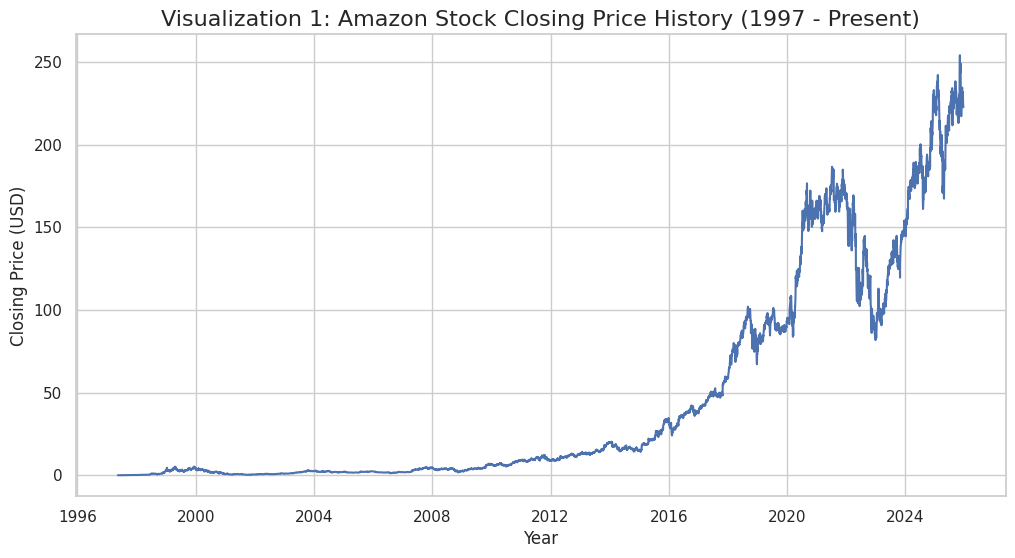

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=amzn_data, x='Date', y='Close', linewidth=1.5)

plt.title('Visualization 1: Amazon Stock Closing Price History (1997 - Present)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.show()

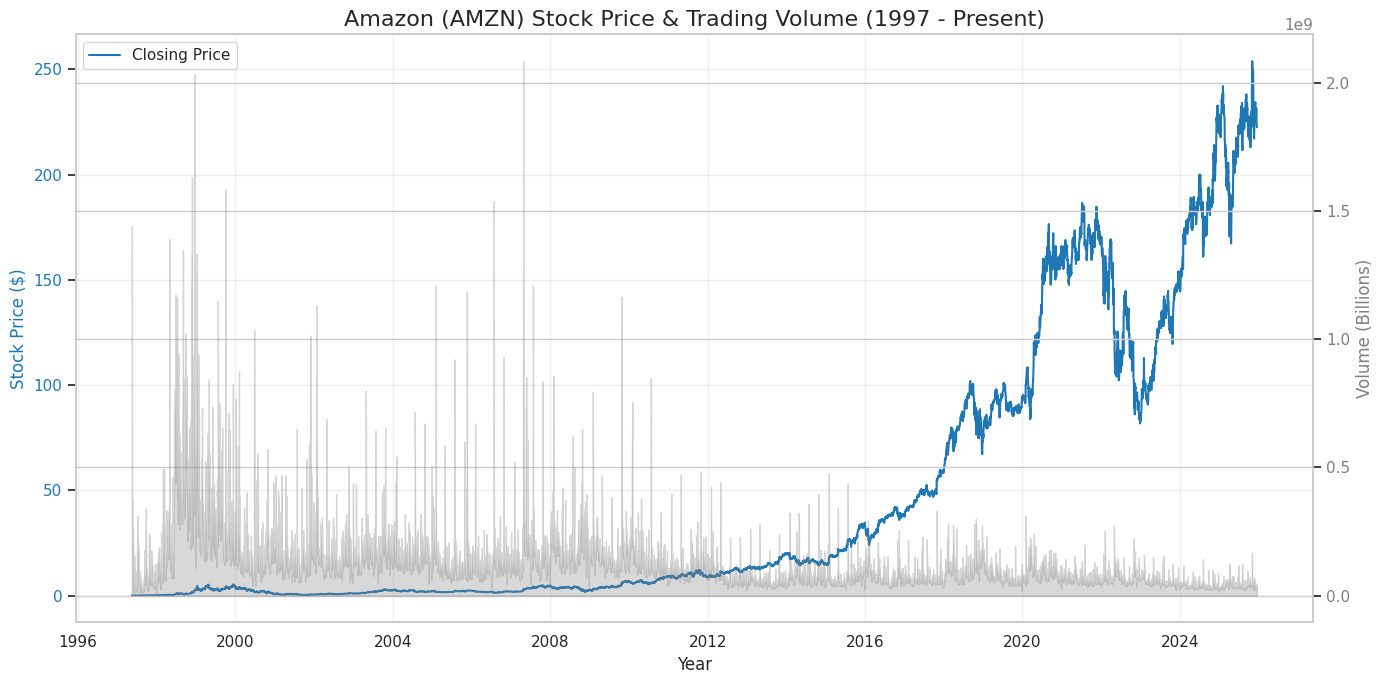

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

amzn_data['Date'] = pd.to_datetime(amzn_data['Date'])

fig, ax1 = plt.subplots(figsize=(14, 7))

sns.lineplot(data=amzn_data, x='Date', y='Close', ax=ax1, color='tab:blue', label='Closing Price')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Stock Price ($)', color='tab:blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
ax2.fill_between(amzn_data['Date'], amzn_data['Volume'], color='tab:gray', alpha=0.3, label='Trading Volume')
ax2.set_ylabel('Volume (Billions)', color='tab:gray', fontsize=12)
ax2.tick_params(axis='y', labelcolor='tab:gray')

# Title and Legend
plt.title('Amazon (AMZN) Stock Price & Trading Volume (1997 - Present)', fontsize=16)
fig.tight_layout()
plt.show()

In [ ]:
#This visualization tracks Amazon's evolution from a small 
online bookseller to a global tech titan by layering two critical metrics: 
the Closing Price and Trading Volume. 
The blue line illustrates the stock's exponential price growth, 
highlighting how the market's valuation of the company accelerated particularly after 2015. 
Beneath that, the shaded gray area represents the volume of shares traded, 
which serves as a proxy for investor interest and market volatility. 
    By viewing these together, you can see how major "spikes" 
in the gray area often coincide with pivotal moments or shifts in the price trend. 
    This dual-axis approach allows us to compare two different scales—dollars and share counts—on a single timeline 
to see the full story of the stock's performance.